# POC in a word perspective

## Main Algorithm:

1. Lemmatization

2. Protect stop words


3. // words (key phrases)   
Do:   
	Look for similar words (DBSCAN)   
Replace with centroid / one of the members   
Until Embedding distance is too high or utilization is too low.   


4. // sentences   
While K-anonymity is not reached:   
Find most similar sentences (Jaccard distance)   
Force them to be similar   

5. Do some utilization test / give some stats…


In [27]:
# For VSCODE
%reload_ext autoreload
%autoreload 2

## 0) Upload data

Import libraries

In [28]:
import pandas as pd

Import project files

In [29]:
#import sys
#sys.path.append("utils")
# from utils import models

In [30]:
from utils import nlp_utils, cluster_utils, utilization_utils, anonym_utils

Uploading data

In [49]:
train_file = 'data/df_filtered_1000.csv'

Getting dataframe

In [50]:
%%time
# Getting the df
#df = reading_bz_file(train_file)
df = pd.read_csv(train_file)

CPU times: total: 15.6 ms
Wall time: 8.67 ms


## 1+2) Lemmatizing and protecting stopwords

Defining the word dictionary

In [51]:
%%time
word_dict = nlp_utils.create_word_dict(df['txt'])
word_list = cluster_utils.get_word_list_for_clustering(word_dict)

CPU times: total: 33.2 s
Wall time: 44.9 s


## 3) Word replacement

### 3.1) Clustering using DBSCAN

#### 3.1.1) Using DBSCAN with the default euclidean distance

Clustering

eps 1.8145278898835595
CPU times: total: 3.42 s
Wall time: 3.5 s


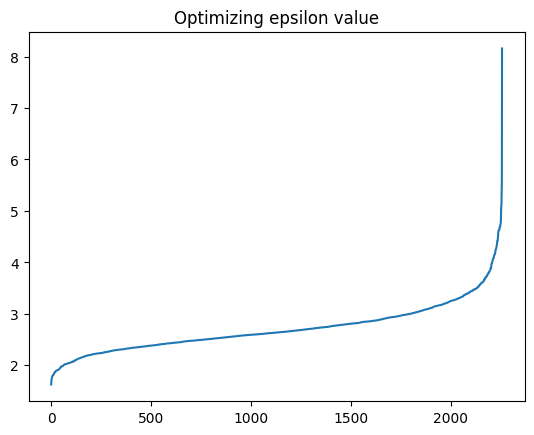

In [52]:
%%time
embedded_dict = cluster_utils.embed_corpus(word_list)
cluster_dict, dist_dict, labels = cluster_utils.run_clustering(embedded_dict)

In [53]:
#for key, val in dist_dict_2.items():
#    print('dist 1:', dist_dict[key], '\tdist 2:', dist_dict_2[key])

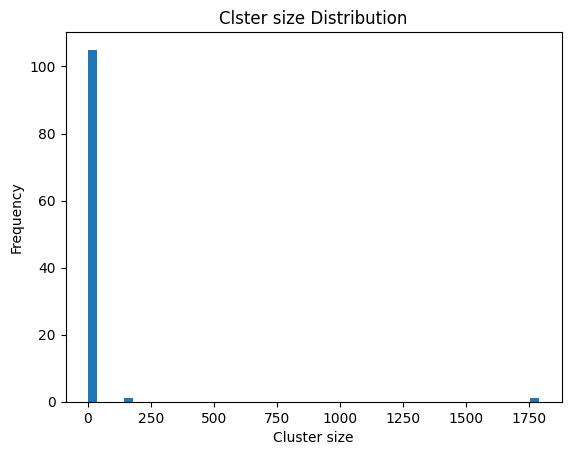

In [54]:
cluster_utils.plot_cluster_size_distribution(cluster_dict)

Plotting tSNE

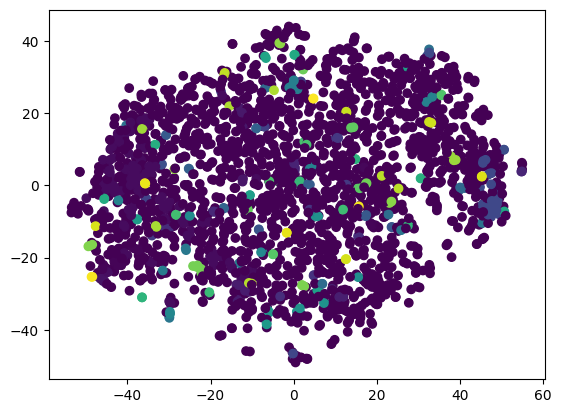

CPU times: total: 1min 2s
Wall time: 25.7 s


In [55]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels)

#### 3.1.2) Using DBSCAN with cosine distance

Testing DBSCAN with cosine metric

eps 0.056689203


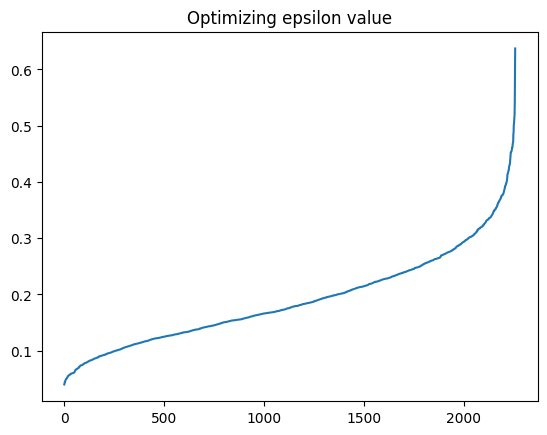

In [56]:
cluster_dict_cos, dist_dict_cos, labels_cos = cluster_utils.run_clustering(embedded_dict, cosine=True)

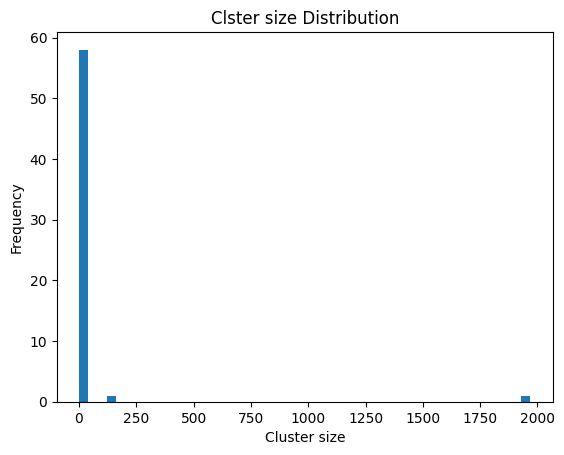

In [57]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_cos)

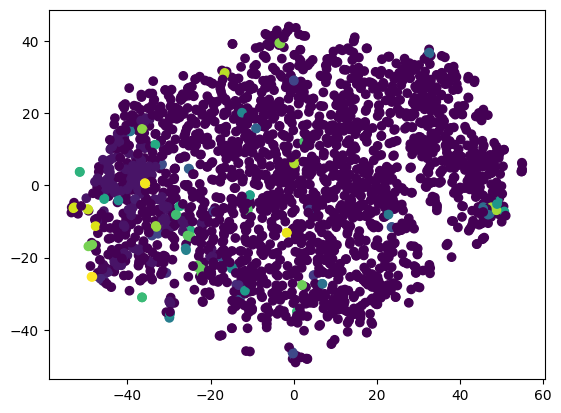

CPU times: total: 1min 7s
Wall time: 18.8 s


In [58]:
%%time
cluster_utils.plot_tsne(embedded_dict, labels_cos)

#### 3.1.3) Using HDBSCAN with UMAP

In [59]:
cluster_dict_h, dist_dict_h, labels_h = cluster_utils.run_clustering_hdbscan(embedded_dict)

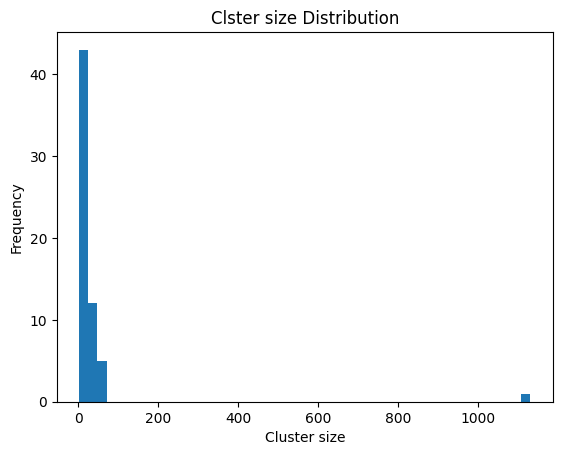

In [60]:
cluster_utils.plot_cluster_size_distribution(cluster_dict_h)

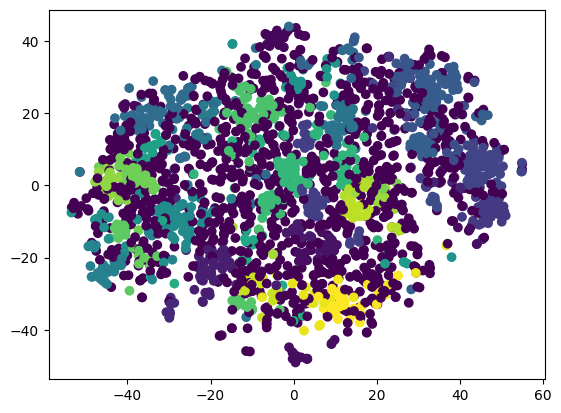

In [61]:
cluster_utils.plot_tsne(embedded_dict, labels_h)

#### 3.1.4) Comapirson

In [62]:
print('Euclidian distance:\t', len(cluster_dict), 'clusters')
print('Cosine distance:\t', len(cluster_dict_cos), 'clusters')
print('HDBSCAN clustering:\t', len(cluster_dict_h), 'clusters')

Euclidian distance:	 107 clusters
Cosine distance:	 60 clusters
HDBSCAN clustering:	 61 clusters


Plotting Jaccard index histogram

In [63]:
test_dict = nlp_utils.create_word_dict(['hi, how are you?', 'I love chocolate', 'I love banana', 'he loves cola'])
test_list = cluster_utils.get_word_list_for_clustering(test_dict)
test_list

['cola', 'love', 'hi', 'banana', 'chocolate']

Getting distance threshold

In [64]:
threshold = cluster_utils.define_max_threshold()
threshold

sim_list_best 0.82521856
sim_list_worst 0.56748897


0.3036462366580963

### 3.2) replacing words in documents

#### 3.2.1) Based on Eucledian distance

In [65]:
######################### TEMP #######################
#df = df[:30]

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.30053166 	replacing ['brother', 'lady', 'kid', 'friend', 'girl', 'prince', 'queen', 'sick', 'boy', 'guy', 'damn', 'baby', 'dude', 'sister', 'bad', 'crazy', 'old', 'mom', 'princess', 'dad'] in like
distance: 0.15960953 	replacing ['actress', 'singer'] in superstar
distance: 0.3408029 the next cluster is too wide and wont be replaced: ['basically', 'happen', 'every', 'mess', 'surprised', 'like', 'need', 'actually', 'tell', 'possibly', 'anyone', 'sure', 'almost', 'rather', 'hit', 'four', 'maybe', 'always', 'would', 'second', 'hardly', 'get', 'go', 'understand', 'fill', 'jump', 'right', 'remember', 'leave', 'absolutely', 'probably', 'otherwise', 'another', 'reason', 'throw', 'might', 'bring', 'apparently', 'hope', 'less', 'exactly', 'take', 'hold', 'talk', 'today', 'run', 'matter', 'still', 'make', 'yesterday', 'catch', 'last', 'spare', 'stick', 'else', 'look', 'stupid', 'many', 'listen',

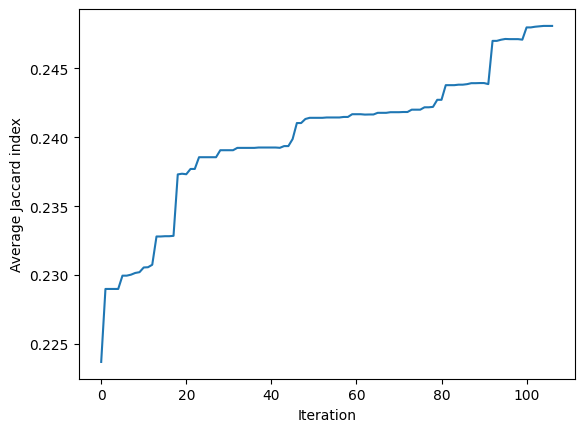

In [66]:
%%time
df_2, word_dict_2 = nlp_utils.replace_words_in_df(df, cluster_dict, dist_dict, threshold, word_dict)

In [67]:
df_2

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - scott ...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,like and twisted is good ... : this book is li...,[like] (and) {twist} (is) [fun] (this) book (i...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


#### 3.2.2) Based on Cosine distance

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.16536334 	replacing ['brother', 'friend', 'sister', 'mom', 'dad'] in daddy
distance: 0.15441173 	replacing ['welcome', 'thank'] in thanks
distance: 0.3355955 the next cluster is too wide and wont be replaced: ['must', 'basically', 'happen', 'every', 'surprised', 'like', 'need', 'actually', 'tell', 'good', 'possibly', 'anyone', 'sure', 'almost', 'kid', 'rather', 'four', 'explain', 'people', 'maybe', 'always', 'would', 'second', 'girl', 'true', 'get', 'work', 'day', 'go', 'understand', 'right', 'different', 'remember', 'leave', 'absolutely', 'nice', 'probably', 'otherwise', 'another', 'reason', 'might', 'bring', 'apparently', 'hope', 'exactly', 'take', 'hold', 'talk', 'today', 'matter', 'still', 'make', 'yesterday', 'last', 'else', 'boy', 'look', 'stupid', 'many', 'listen', 'step', 'obviously', 'hear', 'next', 'guess', 'night', 'able', 'put', 'see', 'pretty', 'three', 'soon', 'though', 

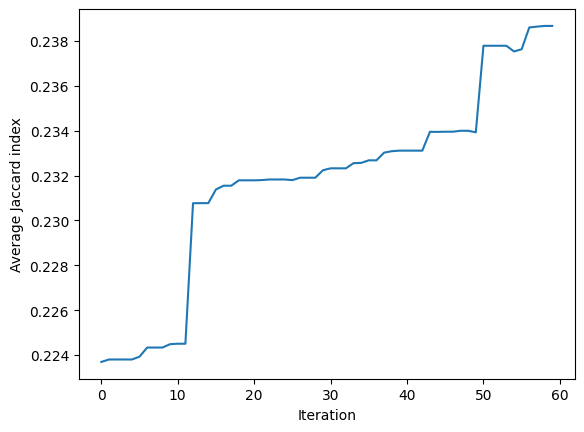

In [68]:
%%time
df_3, word_dict_3 = nlp_utils.replace_words_in_df(df, cluster_dict_cos, dist_dict_cos, threshold, word_dict)

In [69]:
df_3

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was exciting ! ! ! : i like it . it was ver...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this product was just wh...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is good ... : this book is si...,[like] (and) {twist} (is) [fun] (this) book (i...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


#### 3.2.3) Based on HDBSCAN clustering

Starting average Jaccard index: 0.22369185766816038
Distance threshold: 0.3036462366580963
distance: 0.3411538 the next cluster is too wide and wont be replaced: ['player', 'olympic', 'hop', 'hip']
distance: 0.30650088 the next cluster is too wide and wont be replaced: ['brother', 'picture', 'boyfriend', 'father', 'name', 'friend', 'mother', 'girl', 'husband', 'boy', 'wife', 'guy', 'sister', 'uncle', 'girlfriend', 'child', 'roommate', 'old', 'daughter', 'marry', 'mom', 'little', 'woman', 'dad', 'niece', 'nephew']
distance: 0.38681316 the next cluster is too wide and wont be replaced: ['welcome', 'bless', 'nuff', 'soo', 'buddy', 'meet', 'wish', 'pretty', 'sing', 'happy', 'thank', 'dear', 'bf', 'freak', 'miss']
distance: 0.42937967 the next cluster is too wide and wont be replaced: ['fasten', 'dthe', 'girdle', 'kitchenware', 'ewf', 'nozzle', 'hinge', 'seam', 'tenchi', 'sharpie', 'amazone', 'playtex', 'fingernail', 'hitec', 'bunion', 'saucepan', 'sunshade', 'splint', 'earing', 'ecru', 'pa

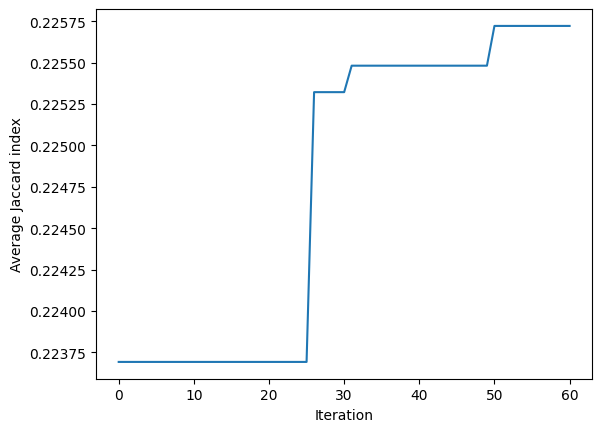

In [70]:
%%time
df_4, word_dict_4 = nlp_utils.replace_words_in_df(df, cluster_dict_h, dist_dict_h, threshold, word_dict)

In [71]:
df_4

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o..."
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) [exciting] (i) like (it.) (it) (was...
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this product was just wh...,{docker} (do) (the) job.: (this) [tools] (was)...
...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - ray ti...,steer clear: steer clear (of) (this) [borderla...
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...
1004,41149,sick and twisted is good...: this book is sick...,1,25,sick and twisted is good ... : this book is si...,[like] (and) {twist} (is) [fun] (this) book (i...
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...


Looking at the histogram again

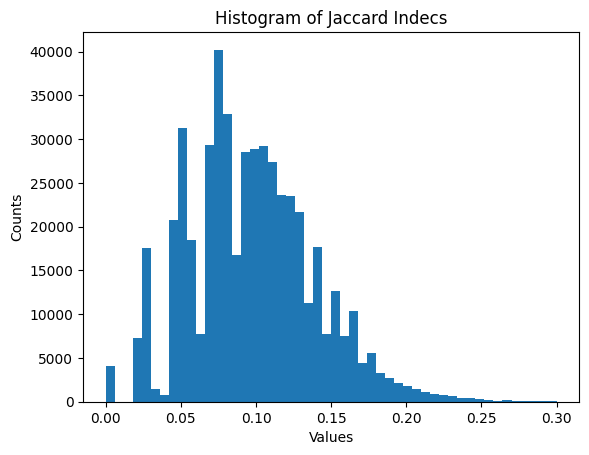

CPU times: total: 8.39 s
Wall time: 8.7 s


In [72]:
%%time
nlp_utils.plot_jaccard_hist(df_2, column='txt')

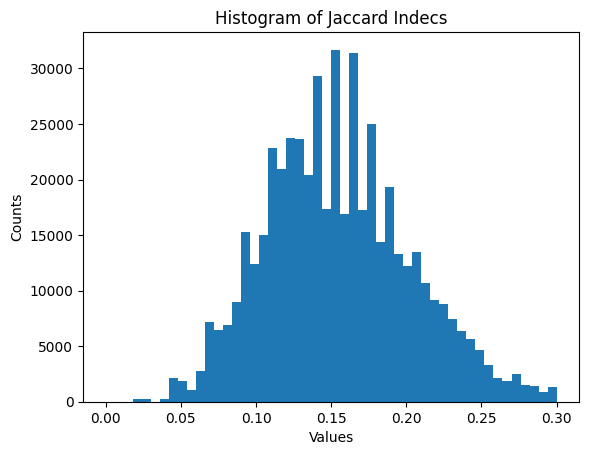

CPU times: total: 8.88 s
Wall time: 9.04 s


In [73]:
%%time
nlp_utils.plot_jaccard_hist(df_2, 'anon_txt')

In [74]:
print('Eucolidian dist:\t', df_2.iloc[3, 4])
print('Cosine dist:\t\t', df_3.iloc[3, 4])
print('HDNSCAN:\t\t', df_4.iloc[3, 4])

Eucolidian dist:	 it was great ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the good .
Cosine dist:		 it was exciting ! ! ! : i like it . it was very cool to answer about vampire and other legendary crature of the night .
HDNSCAN:		 it was great ! ! ! : i like it . it was very cool to read about vampire and other legendary crature of the night .


## 4) Force anonymity

### Get anonymity degree

Before replacement

In [75]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['txt']))

Current k: 1 	number of un-anonym. documents: 1005 	number of all documents: 1007


After replacement

In [76]:
curr_k, non_anon_indexes = anonym_utils.get_anonym_degree(docs=df_2['anon_txt'])
print('Current k:', curr_k, '\tnumber of un-anonym. documents:', len(non_anon_indexes), '\tnumber of all documents:', len(df_2['anon_txt']))

Current k: 1 	number of un-anonym. documents: 1005 	number of all documents: 1007


### 4.1) Method 1 - Forcing Anonymity by Finding the nearest k neighbors
Steps:
1. Finding k nearest neighbors
2. Finding the different words between the neighbors
2. Replacing the different words with *

#### Toy examples

In [77]:
k=2
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3], [1, 2], [4, 5]]

In [78]:
k=3
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala', 'lalalala'], k=k)

[[0, 3, 2], [1, 5, 4]]

The algorithm is greedy

In [79]:
anonym_utils.get_nearest_neighbors(['I love banana', 'he love choco', 'you love choco', 'Jonny love banana', 'lalalala'], k=3)

[[0, 3, 2], [1, 4]]

#### Running on data

##### k=2, df - first 100

In [80]:
df_2_2 = anonym_utils.force_anonym(df_2[:100], k=2)
print(anonym_utils.get_anonym_degree(df_2_2['force_anon_txt']))

fa 1
Start: get_anonym_degree: 1
fa 2
fa 3
fa 5
fa 6
neighbors: [0, 27]
Before:	 voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
After:	 * from the * : i have a copy of this book and * it and ca n't wait * the * * * out in a few *
Before:	 dry : excellent copy and ship fast . this is one of the book that i have been wait to answer . dry book .
After:	 * : * copy and * * . this is one of the book that i have been wait to * . * book .
neighbors: [1, 50]
Before:	 caution ! : these track are not the " original " version but are re - record version . so , whether the track are " remastere " or not is irrelevant .
After:	 * ! : these track are not the " * " * but are re - * * . so , whether the track are " * " or not is * .
Before:	 great : insert the hd and listen to the first track . this is everything chromatic is know for . any fan will love this album
After:	 * : * the * and * to the first track . this is everyth

##### k=3, df - first 100

In [81]:
df_2_2 = anonym_utils.force_anonym(df_2.loc[:100], k=3)
print(anonym_utils.get_anonym_degree(df_2_2['force_anon_txt']))

fa 1
Start: get_anonym_degree: 1
fa 2
fa 3
fa 5
fa 6
neighbors: [0, 27, 60]
Before:	 voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
After:	 * from the * : i have a * of this book and * it and ca n't wait * the * * * out in a few *
Before:	 dry : excellent copy and ship fast . this is one of the book that i have been wait to answer . dry book .
After:	 * : * * and * * . this is one of the book that i have been wait to * . * book .
Before:	 great ! : love the book . was in good condition and arrive in a timely manner ! i can not wait to funish the book . great price too . thank you !
After:	 * ! : * the book . was in * * and * in a * * ! i can not wait to * the book . * * too . * you !
neighbors: [1, 50, 17]
Before:	 caution ! : these track are not the " original " version but are re - record version . so , whether the track are " remastere " or not is irrelevant .
After:	 * ! : these * are not the " * " * but ar

In [82]:
df_2_2 = anonym_utils.force_anonym(df_2.loc[[0, 64, 14, 1, 40, 28],:].reset_index(), k=3)

fa 1
Start: get_anonym_degree: 1
fa 2
fa 3
fa 5
fa 6
neighbors: [0, 3, 5]
Before:	 voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
After:	 * from the * : i have a * of this * and * it and ca n't * * the * * * out in a few *
Before:	 caution ! : these track are not the " original " version but are re - record version . so , whether the track are " remastere " or not is irrelevant .
After:	 * ! : these * are not the " * " * but are re - * * . so , whether the * are " * " or not is * .
Before:	 do n't new it ! : ever since i new this and charge my ibook with it , my ibook has n't work ! do n't new it .
After:	 do n't * it ! : ever since i * this and * my * with it , my * has n't * ! do n't * it .
neighbors: [1, 4, 2]
Before:	 transformer : item waas as describe and ship on time . was a gift and just what was ask for . item was in very good condition .
After:	 * : * * as describe and * on * . was a * and just what w

##### k = 3 , df - all 1000

In [107]:
df_2_2 = anonym_utils.force_anonym(df_2, k=3)
curr_k, un_anonyms = anonym_utils.get_anonym_degree(docs = df_2_2['force_anon_txt'])
print('Anonymity degree:', curr_k, 'un-anonymized documents:', len(un_anonyms))
print(len(un_anonyms))

Start: get_anonym_degree: 1
neighbors: [0, 948, 280]
neighbors: [1, 623, 232]
neighbors: [2, 203, 571]
neighbors: [3, 840, 924]
neighbors: [4, 578, 946]
neighbors: [5, 616, 84]
neighbors: [6, 461, 200]
neighbors: [7, 160, 379]
neighbors: [8, 558, 321]
neighbors: [9, 858, 553]
neighbors: [10, 931, 358]
neighbors: [11, 15, 471]
neighbors: [12, 54, 622]
neighbors: [13, 644, 723]
neighbors: [14, 369, 196]
neighbors: [16, 761, 769]
neighbors: [17, 980, 966]
neighbors: [18, 215, 417]
neighbors: [19, 552, 950]
neighbors: [20, 296, 741]
neighbors: [21, 595, 60]
neighbors: [22, 887, 86]
neighbors: [23, 977, 941]
neighbors: [24, 802, 26]
neighbors: [25, 701, 665]
neighbors: [27, 120, 949]
neighbors: [28, 206, 718]
neighbors: [29, 499, 793]
neighbors: [30, 923, 650]
neighbors: [31, 906, 998]
neighbors: [32, 698, 123]
neighbors: [33, 611, 897]
neighbors: [34, 192, 715]
neighbors: [35, 445, 257]
neighbors: [36, 754, 82]
neighbors: [37, 932, 539]
neighbors: [38, 479, 419]
neighbors: [39, 593, 353]
n

In [108]:
un_anonyms

[[497],
 [816],
 [673],
 [803],
 [82],
 [506],
 [232],
 [720],
 [994],
 [764],
 [218],
 [170],
 [636],
 [74],
 [503],
 [62],
 [388],
 [424],
 [422],
 [265],
 [797],
 [184],
 [848],
 [459],
 [882],
 [229],
 [557],
 [372],
 [607],
 [44],
 [494],
 [403],
 [402],
 [41],
 [508],
 [342],
 [99],
 [550],
 [190],
 [864],
 [108],
 [491],
 [178],
 [295],
 [360],
 [124],
 [894],
 [346],
 [846],
 [881],
 [619],
 [386],
 [513],
 [612],
 [870],
 [554],
 [139],
 [783],
 [501]]

In [84]:
print(df_2_2['anon_txt'][82])
print(df_2_2['force_anon_txt'][82])
print()
print(df_2_2['anon_txt'][98])
print(df_2_2['force_anon_txt'][98])


great hiking boot : these are my 1st pair of hi - tec boot and i could recommend them to anyone look for a tools tools at a great price .
* * * : these are my 1st * of * - * * and i could * them to anyone * for a tool tool at a * price .

new something else : the hd is a documentory , alot of talk and very little music . i think it was them in concert . too much talk
* something else : the hd is a * , * of * and very * * . i * it was them in * . too much *


#### Running on small potion of the data

In [89]:
small_df = anonym_utils.force_anonym(df_2[:5], k=2)

fa 1
Start: get_anonym_degree: 1
fa 2
fa 3
fa 5
fa 6
neighbors: [0, 1]
Before:	 voice from the farm : i have a copy of this book and love it and ca n't wait til the revise version come out in a few week
After:	 * from the * : i have a * of this * and * it and ca n't * * the * version * out in a few *
Before:	 caution ! : these track are not the " original " version but are re - record version . so , whether the track are " remastere " or not is irrelevant .
After:	 * ! : these * are not the " * " version but are re - * version . so , whether the * are " * " or not is * .
neighbors: [2, 4]
Before:	 textbook : book ship quickly and was in excellent condition as state . easy transaction would new again
After:	 * : * * * and was in * * as * . * * would * again
Before:	 docker do the job . : this tool was just what i was hope for , and i had no problem with shipping . i highly recommend this tool .
After:	 * do the * . : this * was just what i was * for , and i had no * with * . i * * this 

In [106]:
small_df['anon_txt']


0    voice from the farm : i have a copy of this bo...
1    caution ! : these track are not the " original...
2    textbook : book ship quickly and was in excell...
3    it was great ! ! ! : i like it . it was very c...
4    docker do the job . : this tools was just what...
Name: anon_txt, dtype: object

In [90]:
small_df['force_anon_txt']


0    * from the * : i have a * of this * and * it a...
1    * ! : these * are not the " * " version but ar...
2    * : * * * and was in * * as * . * * would * again
3                                                    *
4    * do the * . : this * was just what i was * fo...
Name: force_anon_txt, dtype: object

### 4.2) Force anonymity by iterations
Steps:
1. Order the words in the vocabulary by their rareness.
2. Replace the most rare word with * 
3. Test anonymity degree. If the degree is less than the requested - go back to 2.

#### Toy example

In [91]:
anonym_utils.force_anonym_by_iteration(['I love choco', 'I love banana', 'love banana'], k=2)

Start: get_anonym_degree: 1
Replace choco
curr_k 1
Replace banana
curr_k 3
Start: get_anonym_degree: 3


['I love *', 'I love *', 'love *']

#### Running on data

In [92]:
# The full run takes 7 hours!!
anon_txt = anonym_utils.force_anonym_by_iteration(df_2['anon_txt'][:100], k=2)

Start: get_anonym_degree: 1
Replace life
curr_k 1
Replace open
curr_k 1
Replace official
curr_k 1
Replace october
curr_k 1
Replace occasional
curr_k 1
Replace number
curr_k 1
Replace nook
curr_k 1
Replace nirvana
curr_k 1
Replace ninnia
curr_k 1
Replace original
curr_k 1
Replace nevermind
curr_k 1
Replace nap
curr_k 1
Replace myopic
curr_k 1
Replace monitor
curr_k 1
Replace money
curr_k 1
Replace modivation
curr_k 1
Replace model
curr_k 1
Replace middle
curr_k 1
Replace microwave
curr_k 1
Replace necklace
curr_k 1
Replace outrageously
curr_k 1
Replace overview
curr_k 1
Replace pair
curr_k 1
Replace production
curr_k 1
Replace printer
curr_k 1
Replace present
curr_k 1
Replace power
curr_k 1
Replace possibly
curr_k 1
Replace possible
curr_k 1
Replace poorly
curr_k 1
Replace poor
curr_k 1
Replace political
curr_k 1
Replace plus
curr_k 1
Replace pls
curr_k 1
Replace plot
curr_k 1
Replace plenty
curr_k 1
Replace place
curr_k 1
Replace piousness
curr_k 1
Replace ping
curr_k 1
Replace pic
cur

In [93]:
anonym_utils.get_anonym_degree(anon_txt)

(1, [[62], [44], [41]])

In [101]:
print(anon_txt[62])
print(anon_txt[44])
print(anon_txt[41])


* * : this is * and inspiring . i * it for many * who * * is just " on the * " .
* : * are a * * and not * to * . i would n't * this * at this * for anyone serious about cooking .
the * of healing : a * * but it did not have enough * that i could * with my clients.a * * of what is *


#### Running on a small potion of the data

In [95]:
anon_txt_small = anonym_utils.force_anonym_by_iteration(df_2['anon_txt'][:10], k=2)

Start: get_anonym_degree: 1
Replace adam
curr_k 1
Replace revise
curr_k 1
Replace review
curr_k 1
Replace remastere
curr_k 1
Replace record
curr_k 1
Replace recommend
curr_k 1
Replace receive
curr_k 1
Replace rubbish
curr_k 1
Replace quickly
curr_k 1
Replace probably
curr_k 1
Replace present
curr_k 1
Replace possibly
curr_k 1
Replace political
curr_k 1
Replace perfect
curr_k 1
Replace original
curr_k 1
Replace problem
curr_k 1
Replace nice
curr_k 1
Replace sandler
curr_k 1
Replace secret
curr_k 1
Replace wait
curr_k 1
Replace voice
curr_k 1
Replace vampire
curr_k 1
Replace true
curr_k 1
Replace transaction
curr_k 1
Replace trade
curr_k 1
Replace scott
curr_k 1
Replace today
curr_k 1
Replace textbook
curr_k 1
Replace suspense
curr_k 1
Replace state
curr_k 1
Replace son
curr_k 1
Replace ship
curr_k 1
Replace series
curr_k 1
Replace til
curr_k 1
Replace movie
curr_k 1
Replace number
curr_k 1
Replace docker
curr_k 1
Replace amazed
curr_k 1
Replace arrive
curr_k 1
Replace awful
curr_k 1
Rep

In [96]:
anon_txt_small

["* from the * : i have a * of this * and love it and ca n't * * the * * * out in a few *",
 '* ! : these * are not the " * " * but are re - * * . so , whether the * are " * " or not is * .',
 '* : * * * and was in * * as * . * * would * again',
 'it was * ! ! ! : i * it . it was very * to * about * and other * * of the good .',
 '* do the * . : this * was just what i was * for , and i had no * with * . i * * this * .',
 "* : this is * the good * i have ever * . it has * my * * still * . it 's a * of * * .",
 'good * and * * : i * this * used and it was in very good * . also , i * it within a * , which was * .',
 'love * : you have to love the * * by * . this is an * * full of * and * .',
 '* : i * this for a * * for my * . it * in * * . he love * * and * all his * .',
 'just * : this was * the * * i have ever * . i am * by the * of * for this * of * .']

## 5) Utilization tests

In [109]:
df_21 = utilization_utils.get_vader_sentiment_for_df(df_2_2, ['txt', 'anon_txt', 'force_anon_txt'])
df_21

,Unnamed: 0,txt,sentiment,num_of_words,anon_txt,anon_txt_history,force_anon_txt,txt_vader_sentiment_pred,anon_txt_vader_sentiment_pred,force_anon_txt_vader_sentiment_pred
0,84,voices from the farm: i have a copy of this bo...,1,27,voice from the farm : i have a copy of this bo...,{voice} (from) (the) farm: (i) (have) (a) copy...,* from the * : i have a * of this book and lov...,0.6369,0.6369,0.6369
1,99,"caution!: these tracks are not the ""original"" ...",0,22,"caution ! : these track are not the "" original...","caution!: (these) {track} (are) (not) (the) ""o...","* ! : these * are not the "" original "" version...",0.0000,-0.1957,-0.1957
2,100,textbook: book shipped quickly and was in exce...,1,16,textbook : book ship quickly and was in excell...,textbook: book {ship} quickly (and) (was) (in)...,* : * * * and was in * * as * . * * would * again,0.7650,0.7650,0.0000
3,243,it was great!!!: i like it. it was very cool t...,1,21,it was great ! ! ! : i like it . it was very c...,(it) (was) great!!!: (i) like (it.) (it) (was)...,it was great ! ! ! : i * it . it was very * to...,0.7157,0.9181,0.7163
4,269,dockers do the job.: this product was just wha...,1,25,docker do the job . : this tools was just what...,{docker} (do) (the) job.: (this) [tools] (was)...,* do the * . : this tool was just what i was *...,0.1761,0.2006,0.1513
...,...,...,...,...,...,...,...,...,...,...
1002,41002,steer clear: steer clear of this blu-ray title...,0,27,steer clear : steer clear of this blu - scott ...,steer clear: steer clear (of) (this) [borderla...,* * : * * of this * - * * as it is a very * * ...,0.1045,0.7902,0.0000
1003,41045,i like movies: as someone who likes all kinds ...,1,24,i like movie : as someone who like all kind of...,(i) like {movie} (as) someone (who) {like} (al...,i like movie : as someone who like all * of mo...,0.8625,0.8519,0.7845
1004,41149,sick and twisted is good...: this book is sick...,1,25,like and twisted is good ... : this book is li...,[like] (and) {twist} (is) [fun] (this) book (i...,like and * is * ... : this book is like . it i...,-0.4404,0.8910,0.6124
1005,41156,difficult for a lay person: i found this book ...,0,24,difficult for a lay person : i find this book ...,difficult (for) (a) lay person: (i) {find} (th...,* for a * * : i find this book was not very * ...,0.5647,0.4084,0.0000


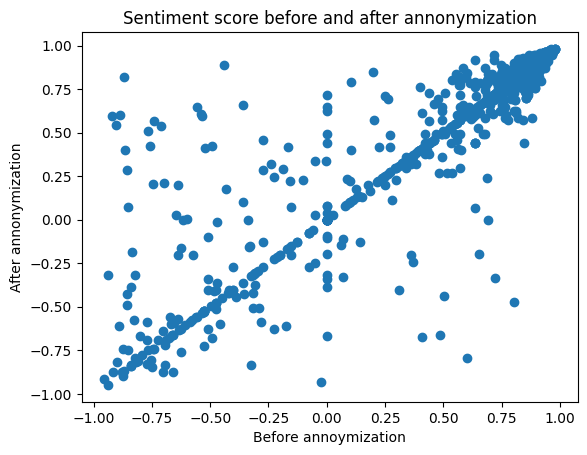

In [111]:
import matplotlib.pyplot as plt

plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


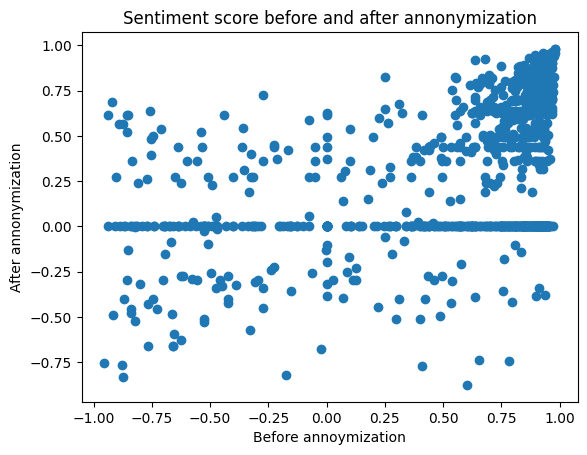

In [112]:
plt.scatter(df_21['txt_vader_sentiment_pred'], df_21['force_anon_txt_vader_sentiment_pred'])
plt.xlabel('Before annoymization')
plt.ylabel('After annonymization')
plt.title('Sentiment score before and after annonymization');


In [122]:
utilization_utils.sentiment_test(df_2_2, 'txt')

863    greatest book i've ever read!!!: the book erag...
92     have not received my item in a month.: my orde...
767    life changer: this book changed my view on the...
485    like looking in a mirror.: mike judge did his ...
257    moon spells: this book is very good, interesti...
                             ...                        
730    very impressed with this cb radio: we were imp...
139    very fun game: in a lot of ways it does show i...
316    a classic: must read! one of my favorite books...
175    lots of errors!!!: this book was a good refres...
391    backgammon attache: this backgammon set is bea...
Name: txt, Length: 805, dtype: object


0.7526923076923077

In [123]:
utilization_utils.sentiment_test(df_2_2, 'anon_txt')

812    worth the money : this is something you will r...
996    great recording : i once had a reel - to - ree...
522    great movie but a cruel hd : this is a cruel l...
926    great : i really love this book it is very coo...
902    perspective : great book . the attention to de...
                             ...                        
949    she was right ! : i 'd recommend this book to ...
388    good : it is a good book for run . it help me ...
870    gr8 : this book is very reasonably price . it ...
736    not thank : i do not believe that the site sho...
357    cult film .... : see this when i was just a li...
Name: anon_txt, Length: 805, dtype: object


0.7871153846153847

The fully anonymized text gets he highest accuracy score!

In [124]:
utilization_utils.sentiment_test(df_2_2, 'force_anon_txt')

566    * : this is the first and the last * of * * th...
507    the * does n't play : the * will not play . i ...
743    great * * : this book was * as a * * and so * ...
740    * is great : i * this * and i * one * . if you...
175    * of * ! ! ! : this book was a good * ... but ...
                             ...                        
397    good * : if you * * then you will * this * ! w...
274    * : this is the most * * * * i have ever answe...
549    its good : * of the * is a good * , but * . i ...
795    * & * : not the * book i ' * ever * . it arriv...
775    * * : the * was * and * * of * . i was * with ...
Name: force_anon_txt, Length: 805, dtype: object


0.8507692307692308